In [1]:
""" k-means of NMF topic components"""

' k-means of NMF topic components'

In [1]:
import pickle
import pandas as pd
import numpy as np


In [2]:
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.cluster import KMeans
import seaborn as sns

In [4]:
with open('cv_nmf_topics_posts2.pickle', 'rb') as read_file:
    posts = pickle.load(read_file)
    
posts.shape

(48082, 41)

In [5]:
posts.columns

Index(['index', 'id', 'created_utc', 'date_time', 'author', 'author_fullname',
       'title', 'url', 'domain', 'num_comments', 'score', 'permalink',
       'full_link', 'refine_title', 'preproc_title', 'unstemmed', 'stem_title',
       'processed_title', 'title_nouns', 'post_topic_nmf', 'title_nouns',
       'C_0', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9',
       'C_10', 'C_11', 'C_12', 'C_13', 'C_14', 'C_15', 'C_16', 'C_17', 'C_18',
       'C_19'],
      dtype='object')

In [6]:
X = np.array(posts[['C_0', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9',
       'C_10', 'C_11', 'C_12', 'C_13', 'C_14', 'C_15', 'C_16', 'C_17', 'C_18', 'C_19']])

In [7]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [10]:
num_clusters = 6
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=5) # n_init, number of times the K-mean algorithm will run
km.fit(X)


KMeans(n_clusters=6, n_init=5, random_state=10)

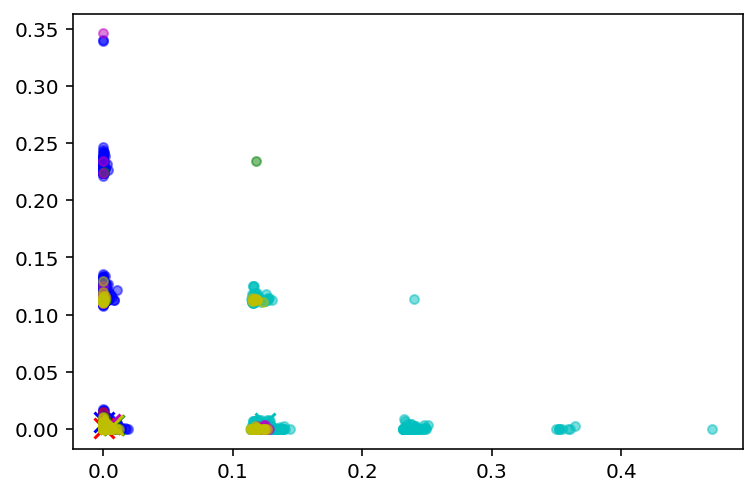

In [11]:
display_cluster(X,km,num_clusters)

In [12]:
clusters = pd.DataFrame(data=km.labels_.tolist(), columns=['cluster'])
#clusters


In [13]:
len(clusters)

48082

In [14]:
clusters.head()

,cluster
0,0
1,5
2,0
3,2
4,5


In [15]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
order_centroids[0]

array([14, 17,  1, 15, 12,  6, 16,  5,  8, 19, 18, 11,  9,  4,  2,  7, 10,
       13,  3,  0])

In [16]:
# add k-means clusters to df

posts_clusters = pd.concat([posts, clusters], axis=1)


In [17]:
posts_clusters.shape

(48082, 42)

In [18]:
posts_clusters.columns

Index(['index', 'id', 'created_utc', 'date_time', 'author', 'author_fullname',
       'title', 'url', 'domain', 'num_comments', 'score', 'permalink',
       'full_link', 'refine_title', 'preproc_title', 'unstemmed', 'stem_title',
       'processed_title', 'title_nouns', 'post_topic_nmf', 'title_nouns',
       'C_0', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9',
       'C_10', 'C_11', 'C_12', 'C_13', 'C_14', 'C_15', 'C_16', 'C_17', 'C_18',
       'C_19', 'cluster'],
      dtype='object')

In [19]:
subset = posts_clusters[['title','post_topic_nmf', 'cluster']]

In [22]:
subset[subset['cluster']==5]

,title,post_topic_nmf,cluster
1,Millions of dynamic DNS users suffer after Mic...,13,5
4,Microsoft May Prioritize The Desktop In Windows 9,13,5
46,"Google, Microsoft clouds now cover MongoDB",13,5
49,Microsoft unveils Android phone,13,5
54,Microsoft brings own security info exchange to...,13,5
...,...,...,...
46979,Microsoft revamps its startup programs with $5...,13,5
47013,Microsoft acquires classroom collaboration sta...,13,5
47211,Microsoft will buy out existing cloud storage ...,13,5
47741,How to remove unwanted apps from Windows 10 (e...,13,5


In [ ]:
# tried many values of k
# kmeans didn't help group the results in different, meaningful way